In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams['figure.figsize']=(20.0,10.0)

In [2]:
dataset=pd.read_csv('C:/Users/hp 15-r032tx/Downloads/purchase_salary.csv')

In [3]:
dataset.shape

(400, 5)

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


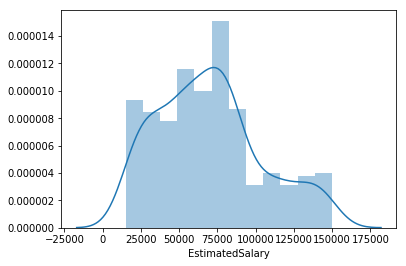

In [6]:
sb.distplot(dataset['EstimatedSalary'])

In [7]:
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [8]:
pd.unique(dataset['Purchased'])

array([0, 1], dtype=int64)

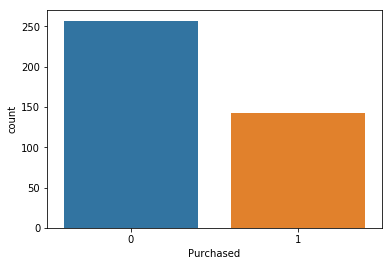

In [9]:
sb.countplot(dataset['Purchased'],label='EstimatedSalary')

In [10]:
#splitting the dataset into the training set and set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=101)

In [11]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
#fitting naive bayes to the training set
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
#predicting the test set results
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [14]:
classifier.score(X_test,y_test)

0.85

In [15]:
#evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[22  5]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88        27
           1       0.71      0.92      0.80        13

   micro avg       0.85      0.85      0.85        40
   macro avg       0.83      0.87      0.84        40
weighted avg       0.88      0.85      0.85        40



In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [17]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('receiver operating characteristict(ROC) curve')
    plt.legend()
    plt.show()

In [18]:
probs=classifier.predict_proba(X_test)
probs

array([[0.97269713, 0.02730287],
       [0.77289258, 0.22710742],
       [0.0275883 , 0.9724117 ],
       [0.93953754, 0.06046246],
       [0.92421264, 0.07578736],
       [0.26613211, 0.73386789],
       [0.98863   , 0.01137   ],
       [0.78011409, 0.21988591],
       [0.96894119, 0.03105881],
       [0.986396  , 0.013604  ],
       [0.0289165 , 0.9710835 ],
       [0.03194924, 0.96805076],
       [0.46266808, 0.53733192],
       [0.90349725, 0.09650275],
       [0.79034337, 0.20965663],
       [0.93623255, 0.06376745],
       [0.06009837, 0.93990163],
       [0.49807051, 0.50192949],
       [0.8060267 , 0.1939733 ],
       [0.35758189, 0.64241811],
       [0.05538501, 0.94461499],
       [0.01141976, 0.98858024],
       [0.68390621, 0.31609379],
       [0.80778384, 0.19221616],
       [0.73868191, 0.26131809],
       [0.98987993, 0.01012007],
       [0.99098094, 0.00901906],
       [0.05813873, 0.94186127],
       [0.46127152, 0.53872848],
       [0.14782848, 0.85217152],
       [0.

In [19]:
probs=probs[:,1]
probs

array([0.02730287, 0.22710742, 0.9724117 , 0.06046246, 0.07578736,
       0.73386789, 0.01137   , 0.21988591, 0.03105881, 0.013604  ,
       0.9710835 , 0.96805076, 0.53733192, 0.09650275, 0.20965663,
       0.06376745, 0.93990163, 0.50192949, 0.1939733 , 0.64241811,
       0.94461499, 0.98858024, 0.31609379, 0.19221616, 0.26131809,
       0.01012007, 0.00901906, 0.94186127, 0.53872848, 0.85217152,
       0.05736112, 0.42200929, 0.01878086, 0.01101583, 0.99398595,
       0.21857475, 0.99691549, 0.94315307, 0.62577467, 0.08068969])

In [20]:
auc=roc_auc_score(y_test,probs)
print('AUC:%.2f'%auc)

AUC:0.94


In [21]:
fpr,tpr,thresholds=roc_curve(y_test,probs)

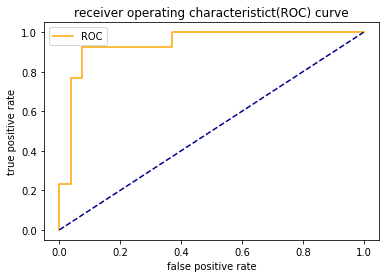

In [22]:
plot_roc_curve(fpr,tpr)

In [23]:
classifier.predict_proba(X_test)

array([[0.97269713, 0.02730287],
       [0.77289258, 0.22710742],
       [0.0275883 , 0.9724117 ],
       [0.93953754, 0.06046246],
       [0.92421264, 0.07578736],
       [0.26613211, 0.73386789],
       [0.98863   , 0.01137   ],
       [0.78011409, 0.21988591],
       [0.96894119, 0.03105881],
       [0.986396  , 0.013604  ],
       [0.0289165 , 0.9710835 ],
       [0.03194924, 0.96805076],
       [0.46266808, 0.53733192],
       [0.90349725, 0.09650275],
       [0.79034337, 0.20965663],
       [0.93623255, 0.06376745],
       [0.06009837, 0.93990163],
       [0.49807051, 0.50192949],
       [0.8060267 , 0.1939733 ],
       [0.35758189, 0.64241811],
       [0.05538501, 0.94461499],
       [0.01141976, 0.98858024],
       [0.68390621, 0.31609379],
       [0.80778384, 0.19221616],
       [0.73868191, 0.26131809],
       [0.98987993, 0.01012007],
       [0.99098094, 0.00901906],
       [0.05813873, 0.94186127],
       [0.46127152, 0.53872848],
       [0.14782848, 0.85217152],
       [0.

In [24]:
X_new=sc.transform([[42,100000]])
classifier.predict(X_new)

array([1], dtype=int64)

In [25]:
import pickle

In [26]:
filename='purchase_salary.csv'
pickle.dump(classifier,open(filename,'wb'))

In [27]:
loaded_model=pickle.load(open(filename,'rb'))
result=loaded_model.predict(X)
print(result[0:5])

[1 1 1 1 1]
